In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
df = pd.read_csv('credit_risk_dataset.csv')

# Cleaning

In [25]:
df.head(10)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
6,26,77100,RENT,8.0,EDUCATION,B,35000,12.42,1,0.45,N,3
7,24,78956,RENT,5.0,MEDICAL,B,35000,11.11,1,0.44,N,4
8,24,83000,RENT,8.0,PERSONAL,A,35000,8.90,1,0.42,N,2
9,21,10000,OWN,6.0,VENTURE,D,1600,14.74,1,0.16,N,3


In [26]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [28]:
# fill na with median... could also delete, but we'll see
df['person_emp_length'].fillna(df['person_emp_length'].median(), inplace=True)
df['loan_int_rate'].fillna(df['loan_int_rate'].median(), inplace=True)

In [29]:
missing_vals = df.isnull().sum()

In [30]:
missing_vals

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [31]:
# remove income outliers for visualizations sake
Q1 = df['person_income'].quantile(0.25)
Q3 = df['person_income'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = df[(df['person_income'] >= lower_bound) & (df['person_income'] <= upper_bound)]

num_rows_before = df.shape[0]
num_rows_after = df_no_outliers.shape[0]

num_rows_before, num_rows_after

(32581, 31097)

In [32]:
# remove age outliers for visualizations sake
Q1 = df['person_age'].quantile(0.25)
Q3 = df['person_age'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers from the dataset
df_no_outliers = df_no_outliers[(df_no_outliers['person_age'] >= lower_bound) & (df_no_outliers['person_age'] <= upper_bound)]

# Display the number of rows before and after removing outliers
num_rows_before = df.shape[0]
num_rows_after = df_no_outliers.shape[0]

num_rows_before, num_rows_after

(32581, 29724)

# Visualizations

### Distributions

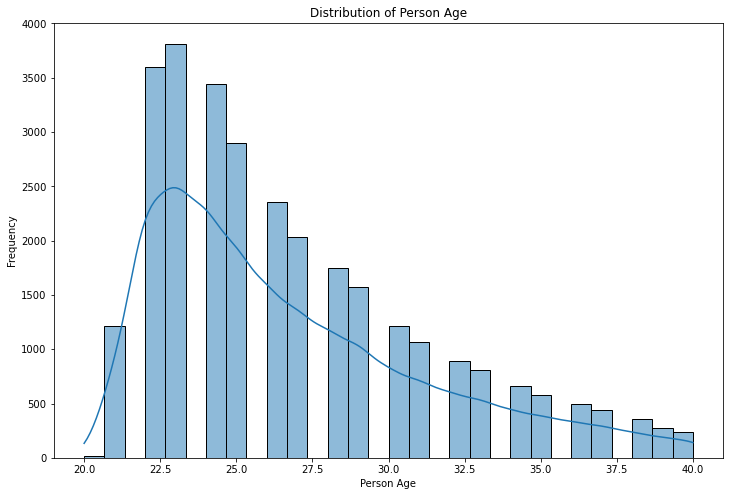

In [45]:
plt.figure(figsize=(12,8), facecolor='white')
sns.histplot(df_no_outliers['person_age'], bins=30, kde=True)
plt.title('Distribution of Person Age')
plt.xlabel('Person Age')
plt.ylabel('Frequency')
plt.show()

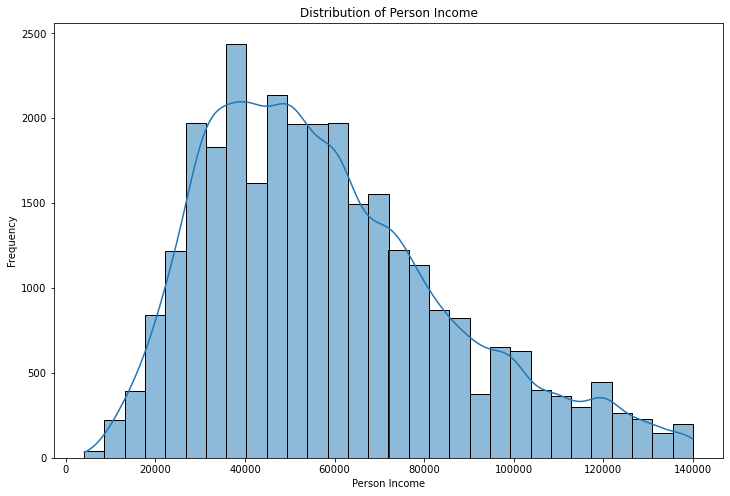

In [46]:
plt.figure(figsize=(12,8), facecolor='white')
sns.histplot(df_no_outliers['person_income'], bins=30, kde=True)
plt.title('Distribution of Person Income')
plt.xlabel('Person Income')
plt.ylabel('Frequency')
plt.show()

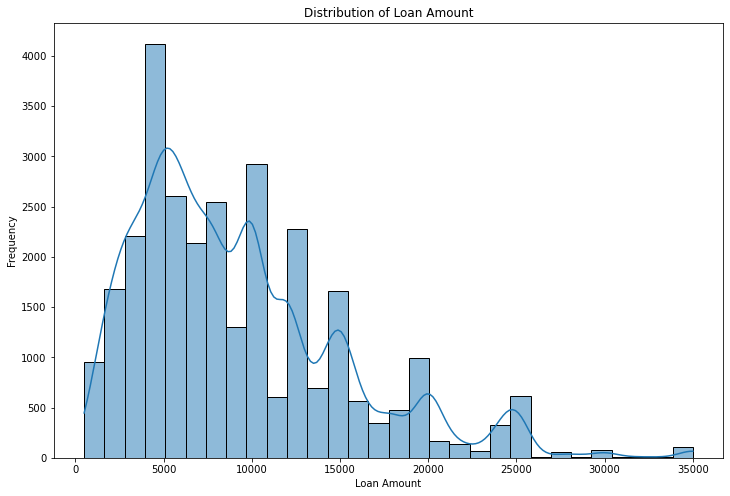

In [47]:
plt.figure(figsize=(12,8), facecolor='white')
sns.histplot(df_no_outliers['loan_amnt'], bins=30, kde=True)
plt.title('Distribution of Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

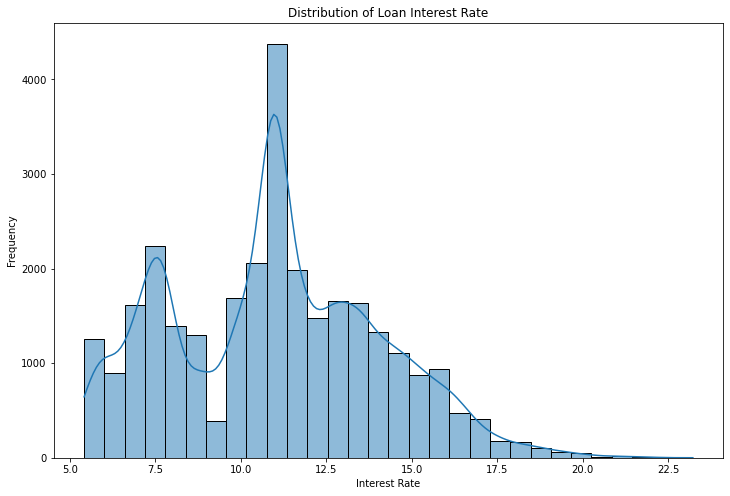

In [48]:
plt.figure(figsize=(12,8), facecolor='white')
sns.histplot(df_no_outliers['loan_int_rate'], bins=30, kde=True)
plt.title('Distribution of Loan Interest Rate')
plt.xlabel('Interest Rate')
plt.ylabel('Frequency')
plt.show()

In [37]:
df2 = df_no_outliers

In [38]:
df2.shape

(29724, 12)

### Heatmap

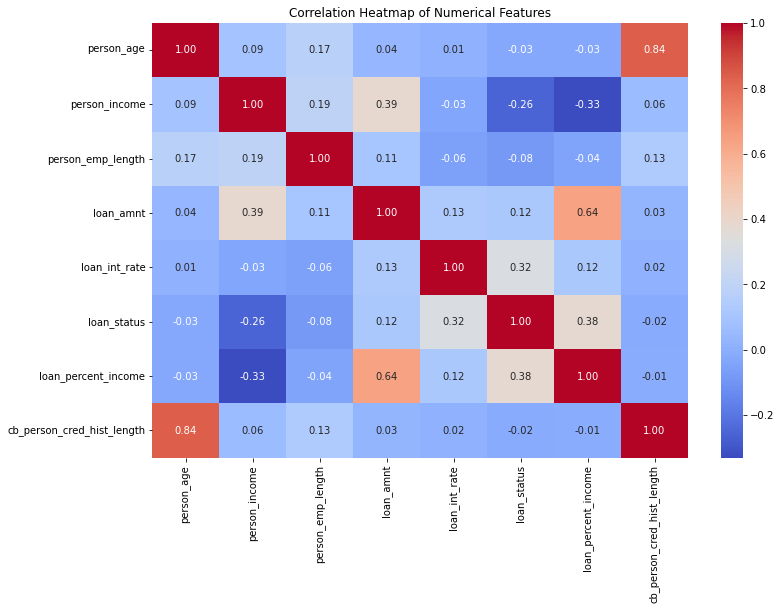

In [39]:
# correlation heatmap
plt.figure(figsize=(12, 8), facecolor='white')
correlation_matrix = df2.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

### Scatterplots

In [40]:
rgp = sns.color_palette(['#0000FF', '#FF0000'])

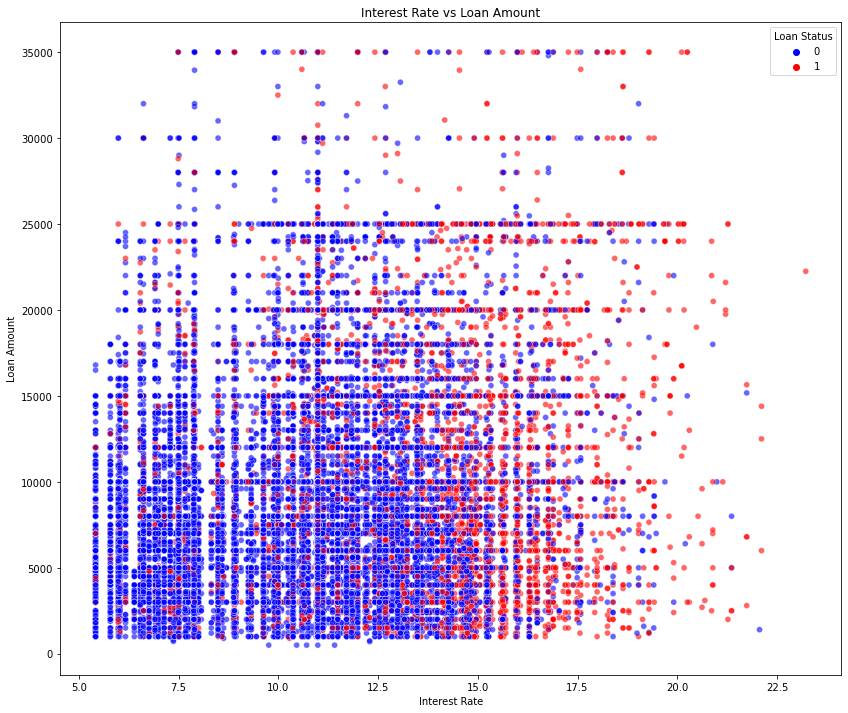

In [50]:
plt.figure(figsize=(14,12), facecolor='white')
sns.scatterplot(data=df2, x='loan_int_rate', y='loan_amnt', hue ='loan_status', palette=rgp, alpha=0.6).legend(title='Loan Status')
plt.title('Interest Rate vs Loan Amount')
plt.xlabel('Interest Rate')
plt.ylabel('Loan Amount')
plt.show()

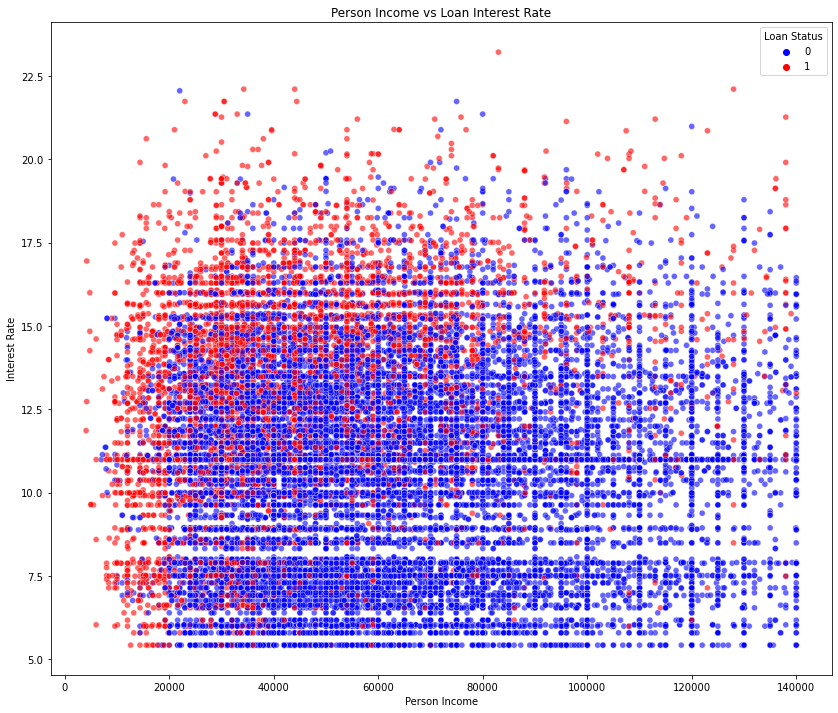

In [42]:
plt.figure(figsize=(14,12), facecolor='white')
sns.scatterplot(data=df2, x='person_income', y='loan_int_rate', hue='loan_status', palette=rgp, alpha=0.6).legend(title='Loan Status')
plt.title('Person Income vs Loan Interest Rate')
plt.xlabel('Person Income')
plt.ylabel('Interest Rate')
plt.show()

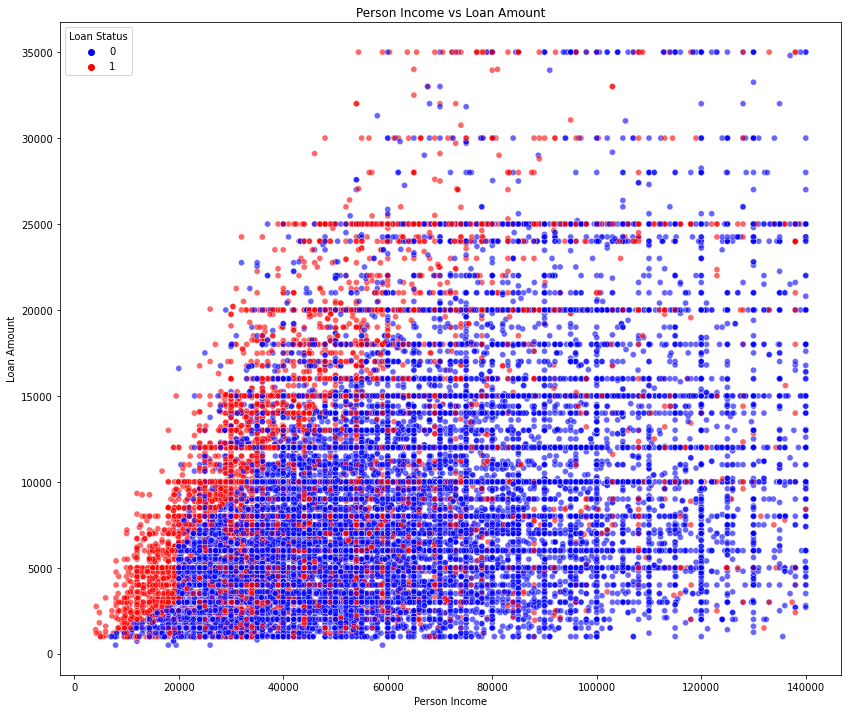

In [43]:
plt.figure(figsize=(14,12), facecolor='white')
sns.scatterplot(data=df2, x='person_income', y='loan_amnt', hue='loan_status', palette=rgp, alpha=0.6).legend(title='Loan Status')
plt.title('Person Income vs Loan Amount')
plt.xlabel('Person Income')
plt.ylabel('Loan Amount')
plt.show()

### Default Rates 

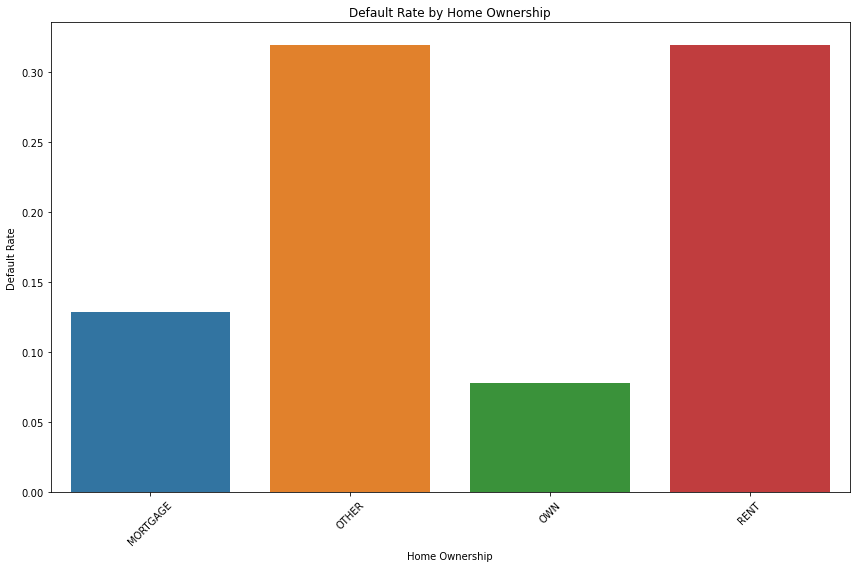

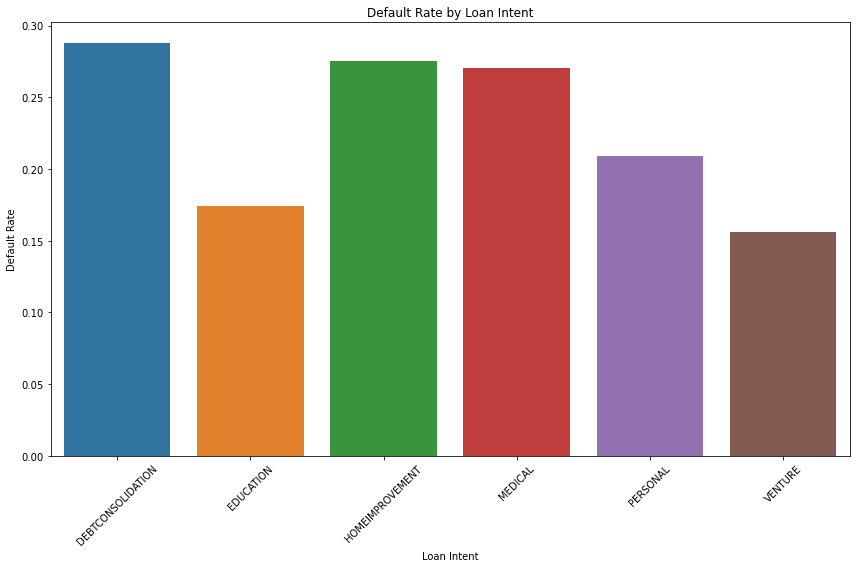

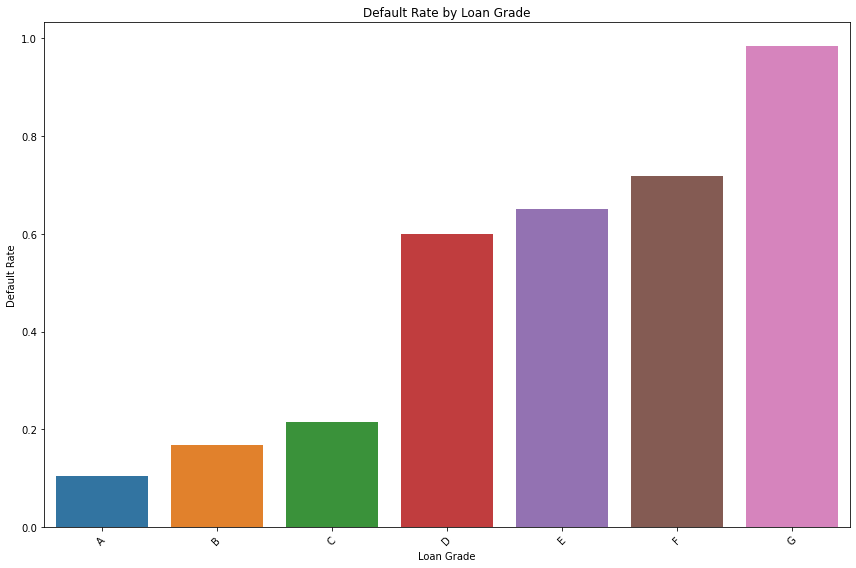

In [44]:

default_rates_home_ownership = df2.groupby('person_home_ownership')['loan_status'].mean()
default_rates_loan_intent = df2.groupby('loan_intent')['loan_status'].mean()
default_rates_loan_grade = df2.groupby('loan_grade')['loan_status'].mean()

plt.figure(figsize=(12, 8), facecolor='white')

plt1 = sns.barplot(x=default_rates_home_ownership.index, y=default_rates_home_ownership.values)
plt1.set_title('Default Rate by Home Ownership')
plt1.set_ylabel('Default Rate')
plt1.set_xlabel('Home Ownership')
plt1.set_xticklabels(plt1.get_xticklabels(), rotation=45)
plt.tight_layout()
plt.savefig('Charts/default_rate_home_ownership.png', bbox_inches='tight')
plt.show()

plt.figure(figsize=(12, 8), facecolor='white')

# Default Rate by Loan Intent
plt2 = sns.barplot(x=default_rates_loan_intent.index, y=default_rates_loan_intent.values)
plt2.set_title('Default Rate by Loan Intent')
plt2.set_ylabel('Default Rate')
plt2.set_xlabel('Loan Intent')
plt2.set_xticklabels(plt2.get_xticklabels(), rotation=45)
plt.tight_layout()
plt.savefig('Charts/default_rate_loan_intent.png', bbox_inches='tight')
plt.show()

plt.figure(figsize=(12, 8), facecolor='white')

# Default Rate by Loan Grade
plt3 = sns.barplot(x=default_rates_loan_grade.index, y=default_rates_loan_grade.values)
plt3.set_title('Default Rate by Loan Grade')
plt3.set_ylabel('Default Rate')
plt3.set_xlabel('Loan Grade')
plt3.set_xticklabels(plt3.get_xticklabels(), rotation=45)
plt.tight_layout()
plt.savefig('Charts/default_rate_loan_grade.png', bbox_inches='tight')
plt.show()


# Modeling

### Encoding  & Train Test Split

In [23]:
# encode categorical columns, drop first to avoid perfect multicollinearity
df_encoded = pd.get_dummies(df2, columns=[
    'person_home_ownership', 
    'loan_intent', 
    'loan_grade', 
    'cb_person_default_on_file'
], drop_first=True)

df_encoded.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
0,22,59000,123.0,35000,16.02,1,0.59,3,0,0,...,0,1,0,0,0,1,0,0,0,1
1,21,9600,5.0,1000,11.14,0,0.10,2,0,1,...,0,0,0,1,0,0,0,0,0,0
2,25,9600,1.0,5500,12.87,1,0.57,3,0,0,...,1,0,0,0,1,0,0,0,0,0
3,23,65500,4.0,35000,15.23,1,0.53,2,0,0,...,1,0,0,0,1,0,0,0,0,0
4,24,54400,8.0,35000,14.27,1,0.55,4,0,0,...,1,0,0,0,1,0,0,0,0,1


In [24]:
from sklearn.model_selection import train_test_split

# Define the features (X) and the target variable (y)
X = df_encoded.drop(columns=['loan_status'])
y = df_encoded['loan_status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

# Display the shapes of the resulting datasets
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((23779, 22), (5945, 22), (23779,), (5945,))

### Logistic Regression Model

In [63]:
# Logistic Regression Model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc, precision_recall_curve

log_reg = LogisticRegression(max_iter=1000, random_state=23)
log_reg.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_prob = log_reg.predict_proba(X_test)[:, 1]
y_pred = log_reg.predict(X_test)

# Evaluate the model
conf_matrix_lr = confusion_matrix(y_test, y_pred)
class_report_lr = classification_report(y_test, y_pred)
roc_auc_lr = roc_auc_score(y_test, y_pred_prob)


print("Logistic Regression:\n", conf_matrix_lr)
print("\nClassification Report:\n", class_report_lr)
print("\nROC AUC Score:", roc_auc_lr)


Logistic Regression:
 [[4396  203]
 [ 685  661]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.96      0.91      4599
           1       0.77      0.49      0.60      1346

    accuracy                           0.85      5945
   macro avg       0.82      0.72      0.75      5945
weighted avg       0.84      0.85      0.84      5945


ROC AUC Score: 0.8476658631455188


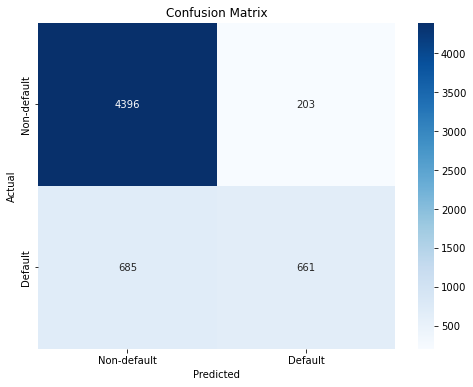

In [61]:
plt.figure(figsize=(8, 6), facecolor='white')
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-default', 'Default'], yticklabels=['Non-default', 'Default'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

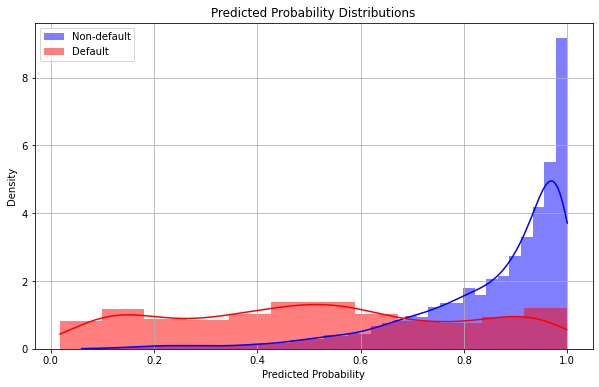

In [57]:
# Plot probability distributions
plt.figure(figsize=(10, 6), facecolor='white')
sns.histplot(y_pred_prob[y_test == 0], color='blue', label='Non-default', kde=True, stat="density", linewidth=0)
sns.histplot(y_pred_prob[y_test == 1], color='red', label='Default', kde=True, stat="density", linewidth=0)
plt.xlabel('Predicted Probability')
plt.ylabel('Density')
plt.title('Predicted Probability Distributions')
plt.legend(loc='best')
plt.grid(True)
plt.show()

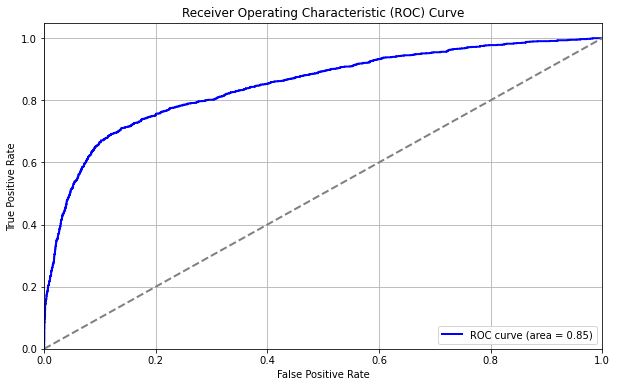

In [62]:
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(10, 6), facecolor='white')
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

### Decision Tree Model

In [30]:
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((23779, 22), (5945, 22), (23779,), (5945,))

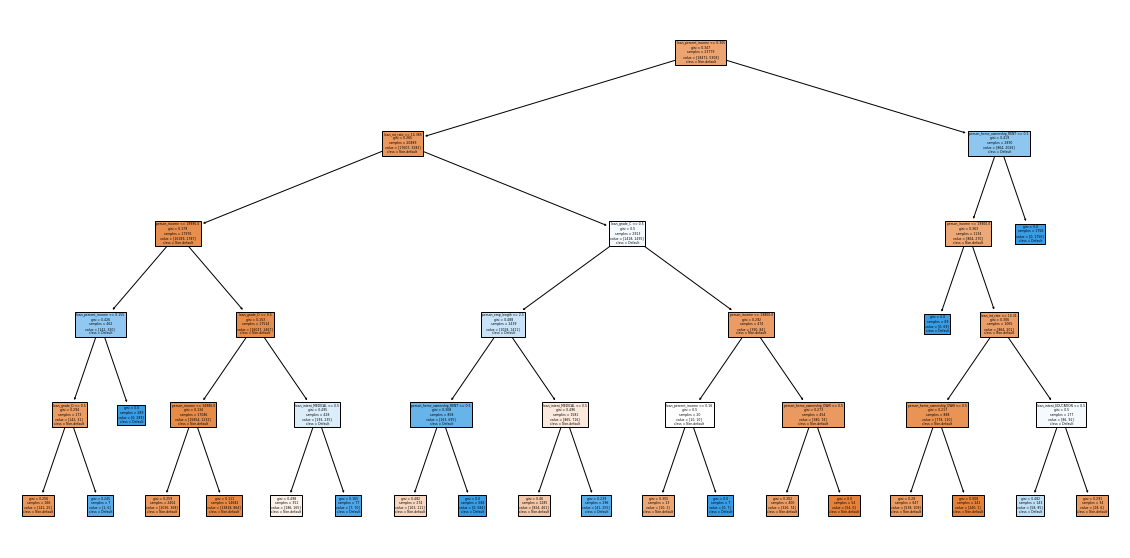

Decision Tree:
 [[4567   32]
 [ 541  805]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.99      0.94      4599
           1       0.96      0.60      0.74      1346

    accuracy                           0.90      5945
   macro avg       0.93      0.80      0.84      5945
weighted avg       0.91      0.90      0.89      5945


ROC AUC Score: 0.8729808179115105


In [65]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

decision_tree = DecisionTreeClassifier(random_state=23, max_depth=5)
decision_tree.fit(X_train, y_train)

# Visualize the Decision Tree
plt.figure(figsize=(20, 10), facecolor='white')
plot_tree(decision_tree, feature_names=X.columns, class_names=['Non-default', 'Default'], filled=True)
plt.show()

# Evaluate the model
y_pred_dt = decision_tree.predict(X_test)
y_pred_prob_dt = decision_tree.predict_proba(X_test)[:, 1]
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
class_report_dt = classification_report(y_test, y_pred_dt)
roc_auc_dt = roc_auc_score(y_test, y_pred_prob_dt)

print("Decision Tree:\n", conf_matrix_dt)
print("\nClassification Report:\n", class_report_dt)
print("\nROC AUC Score:", roc_auc_dt)

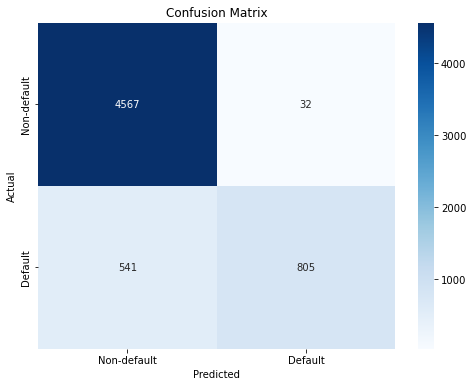

In [67]:
plt.figure(figsize=(8, 6), facecolor='white')
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-default', 'Default'], yticklabels=['Non-default', 'Default'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

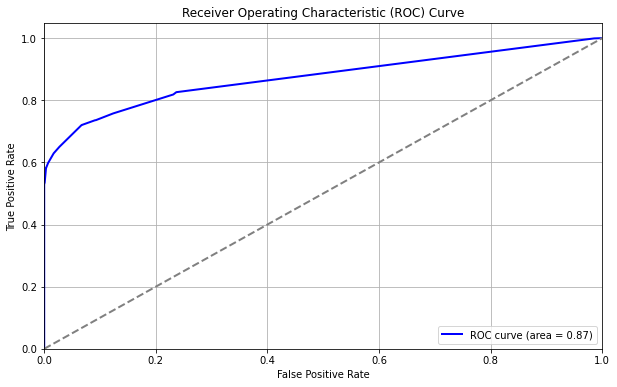

In [66]:
# ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_prob_dt)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6), facecolor='white')
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

### Random Forest Model

In [34]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest model
random_forest = RandomForestClassifier(random_state=23, n_estimators=100)
random_forest.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_rf = random_forest.predict(X_test)
y_pred_prob_rf = random_forest.predict_proba(X_test)[:, 1]

# Evaluate the model
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_prob_rf)

print("Decision Tree:\n", conf_matrix_rf)
print("\nClassification Report:\n", class_report_rf)
print("\nROC AUC Score:", roc_auc_rf)

Decision Tree:
 [[4546   53]
 [ 359  987]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96      4599
           1       0.95      0.73      0.83      1346

    accuracy                           0.93      5945
   macro avg       0.94      0.86      0.89      5945
weighted avg       0.93      0.93      0.93      5945


ROC AUC Score: 0.933423652728951


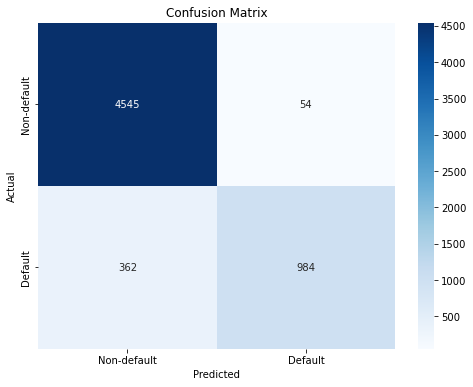

In [68]:
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6), facecolor='white')
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-default', 'Default'], yticklabels=['Non-default', 'Default'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

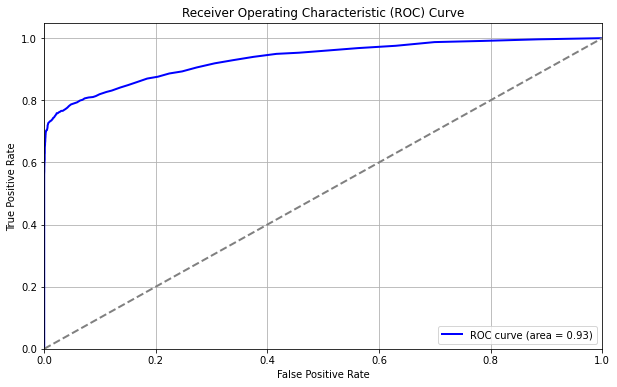

In [36]:
fpr, tpr, _ = roc_curve(y_test, y_pred_prob_rf)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

### Random Forest Fine Tuned 

In [37]:
from sklearn.model_selection import train_test_split, GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

rf = RandomForestClassifier(random_state=23)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='roc_auc')


grid_search.fit(X_train, y_train)

print("Best Parameters: ", grid_search.best_params_)
print("Best ROC AUC Score: ", grid_search.best_score_)

# Train the model with the best parameters
best_rf = grid_search.best_estimator_
best_rf.fit(X_train, y_train)

y_pred_rf = best_rf.predict(X_test)
y_pred_prob_rf = best_rf.predict_proba(X_test)[:, 1]

conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_prob_rf)

print("Random Forest:\n", conf_matrix_rf)
print("\nClassification Report:\n", class_report_rf)
print("\nROC AUC Score:", roc_auc_rf)

Fitting 3 folds for each of 216 candidates, totalling 648 fits
Best Parameters:  {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best ROC AUC Score:  0.9287405032741135
Random Forest:
 [[4545   54]
 [ 362  984]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96      4599
           1       0.95      0.73      0.83      1346

    accuracy                           0.93      5945
   macro avg       0.94      0.86      0.89      5945
weighted avg       0.93      0.93      0.93      5945


ROC AUC Score: 0.9350533919932849


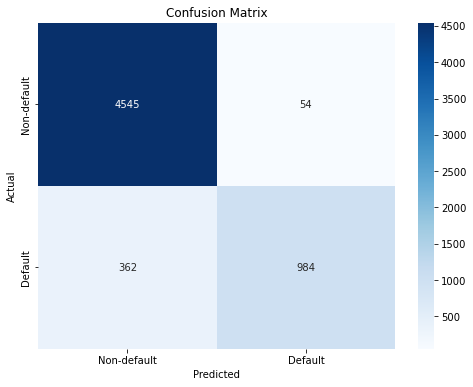

In [69]:
plt.figure(figsize=(8, 6), facecolor='white')
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-default', 'Default'], yticklabels=['Non-default', 'Default'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

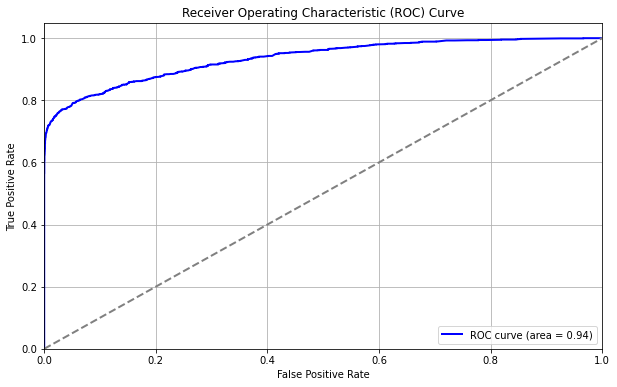

In [70]:
fpr, tpr, _ = roc_curve(y_test, y_pred_prob_rf)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6), facecolor='white')
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

### Fine Tuning Made Almost No Difference In This Case

In [40]:
ex = {
  "person_age": 45,
  "person_income": 55000,
  "person_emp_length": 2,
  "loan_amnt": 15000,
  "loan_int_rate": 11.25,
  "loan_percent_income": 0.170203,
  "cb_person_cred_hist_length": 3,
  "person_home_ownership_OTHER": 0, 
  "person_home_ownership_OWN": 1,
  "person_home_ownership_RENT": 0, 
  "loan_intent_EDUCATION": 1,
  "loan_intent_HOMEIMPROVEMENT": 0, 
  "loan_intent_MEDICAL": 0,
  "loan_intent_PERSONAL": 0, 
  "loan_intent_VENTURE": 0,
  "loan_grade_B": 1,
  "loan_grade_C": 0,
  "loan_grade_D": 0,
  "loan_grade_E": 0,
  "loan_grade_F": 0,
  "loan_grade_G": 0,
  "cb_person_default_on_file_Y": 0
}

In [41]:
input_example_data = pd.DataFrame(ex, index=[0])

In [42]:
X_train.columns

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN',
       'person_home_ownership_RENT', 'loan_intent_EDUCATION',
       'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL',
       'loan_intent_PERSONAL', 'loan_intent_VENTURE', 'loan_grade_B',
       'loan_grade_C', 'loan_grade_D', 'loan_grade_E', 'loan_grade_F',
       'loan_grade_G', 'cb_person_default_on_file_Y'],
      dtype='object')

In [43]:
prediction = best_rf.predict(input_example_data)
prediction_probability = best_rf.predict_proba(input_example_data)[:, prediction[0]]

In [44]:
print(f'Model Default Prediction: {prediction[0]}')
print(f'Model Confidence in Prediction: {prediction_probability[0]}%')

Model Default Prediction: 0
Model Confidence in Prediction: 0.95%


# Feature Importance Analysis

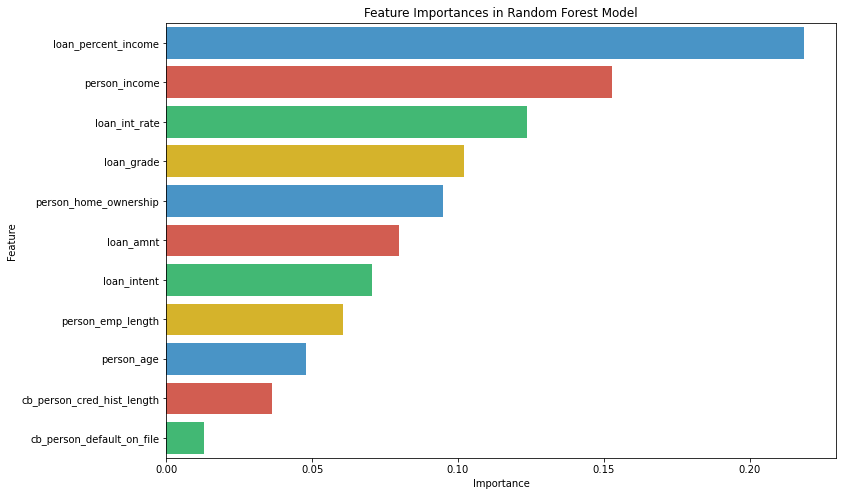

In [71]:
feature_names = [
    'person_age', 'person_income', 'person_emp_length', 'loan_amnt',
    'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
    'person_home_ownership_OTHER', 'person_home_ownership_OWN',
    'person_home_ownership_RENT', 'loan_intent_EDUCATION',
    'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL',
    'loan_intent_PERSONAL', 'loan_intent_VENTURE', 'loan_grade_B',
    'loan_grade_C', 'loan_grade_D', 'loan_grade_E', 'loan_grade_F',
    'loan_grade_G', 'cb_person_default_on_file_Y'
]

# Need to undo encoding to represent categorical values correctly in feature importance
categorical_mapping = {
    'person_home_ownership': ['person_home_ownership_OTHER', 'person_home_ownership_OWN', 'person_home_ownership_RENT'],
    'loan_intent': ['loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE'],
    'loan_grade': ['loan_grade_B', 'loan_grade_C', 'loan_grade_D', 'loan_grade_E', 'loan_grade_F', 'loan_grade_G'],
    'cb_person_default_on_file': ['cb_person_default_on_file_Y']
}


feature_importances = best_rf.feature_importances_

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# aggregate importances for dummy variables
for category, dummies in categorical_mapping.items():
    total_importance = importance_df[importance_df['Feature'].isin(dummies)]['Importance'].sum()
    importance_df = importance_df[~importance_df['Feature'].isin(dummies)]
    importance_df = importance_df.append({'Feature': category, 'Importance': total_importance}, ignore_index=True)

importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8), facecolor='white')
custom_palette = sns.color_palette(["#3498db", "#e74c3c", "#2ecc71", "#f1c40f"])
sns.barplot(x='Importance', y='Feature', data=importance_df, palette=custom_palette)
plt.title('Feature Importances in Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()